In [1]:
### Judul: Studi Kasus Q-Learning untuk Mengendalikan Robot dalam Lingkungan Grid

In [2]:
%pip install seaborn matplotlib

73.35s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 4.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 4.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 4.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [16]:
rows, cols = 5, 5  # Ukuran grid 5x5
start_state = (0, 0)  # Posisi awal robot
goal_state = (4, 4)  # Posisi tujuan robot
grid_rewards = np.zeros((rows, cols))  # Reward default adalah 0
grid_rewards[goal_state] = 10 

In [17]:
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.2  # Epsilon untuk eksplorasi vs eksploitasi
num_episodes = 500  

In [18]:
Q_table = np.zeros((rows, cols, 4))

In [19]:
def choose_action(state):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.randint(0, 4)  # Eksplorasi (pilih aksi acak)
    else:
        return np.argmax(Q_table[state])  

In [21]:
def take_action(state, action):
    i, j = state
    if action == 0:  # Atas
        next_state = (max(i - 1, 0), j)
    elif action == 1:  # Bawah
        next_state = (min(i + 1, rows - 1), j)
    elif action == 2:  # Kiri
        next_state = (i, max(j - 1, 0))
    elif action == 3:  # Kanan
        next_state = (i, min(j + 1, cols - 1))
    
    reward = grid_rewards[next_state]
    done = next_state == goal_state
    return next_state, reward, done

In [22]:
for episode in range(num_episodes):
    state = start_state
    done = False
    while not done:
        # Pilih aksi
        action = choose_action(state)
        # Ambil aksi dan dapatkan state berikutnya
        next_state, reward, done = take_action(state, action)
        best_next_action = np.argmax(Q_table[next_state])
        Q_table[state][action] += alpha * (
            reward + gamma * Q_table[next_state][best_next_action] - Q_table[state][action]
        )
        state = next_state

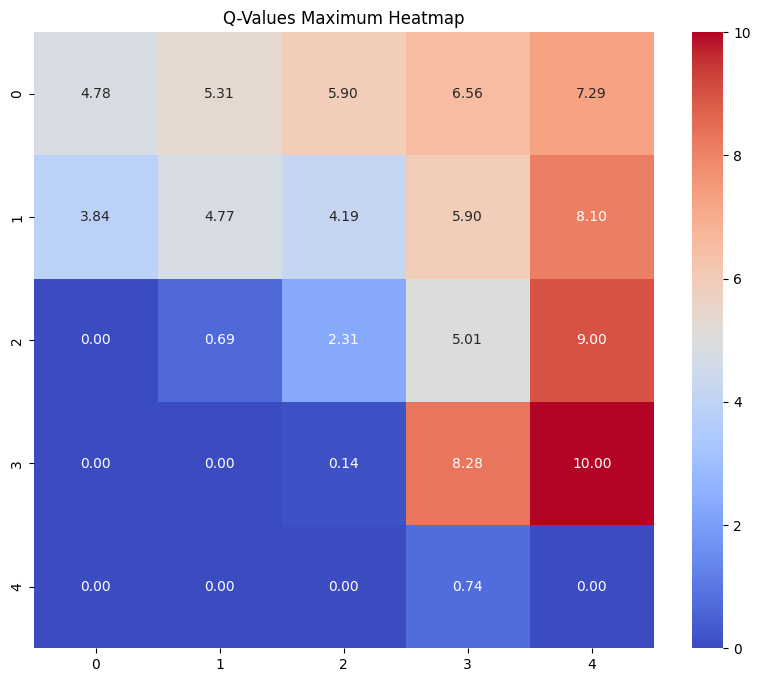

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(np.max(Q_table, axis=2), annot=True, fmt='.2f', cmap='coolwarm', ax=ax)
plt.title("Q-Values Maximum Heatmap")
plt.show()

In [24]:
# Fungsi untuk menampilkan rute optimal
def get_optimal_path(start):
    path = [start]
    state = start
    while state != goal_state:
        action = np.argmax(Q_table[state])
        state, _, _ = take_action(state, action)
        path.append(state)
    return path


In [25]:
# Tampilkan rute optimal
optimal_path = get_optimal_path(start_state)
print("Rute optimal yang ditemukan robot:", optimal_path)

Rute optimal yang ditemukan robot: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]
